In [ ]:
import tensorflow as ts
# to recognize image,signature,handwriting

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

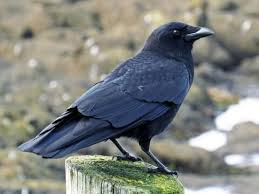

In [ ]:
img=image.load_img("/content/drive/MyDrive/images-1/training/birds/bird 2.jpeg") #it is used to load the image
img

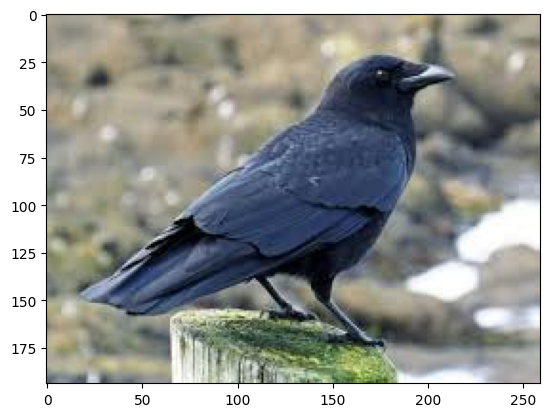

In [ ]:
plt.imshow(img) #displays the data as an image

In [ ]:
cv2.imread("/content/drive/MyDrive/images-1/training/birds/bird 2.jpeg").shape #gives the dimensions of the image and 3 represents the color 'RGB'
#read the file from specific path
#980*1470 - image size
#3 - rgb color

(194, 259, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
#Original images consist in RBG coeffiecients in 0-255 , such values would be too high for our model tp process
# so that we rescale the image

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/images-1/training",target_size=(200,200),batch_size=3,class_mode='binary')


Found 14 images belonging to 2 classes.


In [ ]:
validation_dataset=train.flow_from_directory("/content/drive/MyDrive/images-1/validation",target_size=(200,200),batch_size=3,class_mode='binary')

Found 13 images belonging to 2 classes.


In [ ]:
train_dataset.classes
# 0 -Jet Images
# 1 -Other Images

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model=ts.keras.models.Sequential([ts.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  ts.keras.layers.MaxPool2D(2,2),

                                  ts.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  ts.keras.layers.MaxPool2D(2,2),

                                  ts.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  ts.keras.layers.MaxPool2D(2,2),

                                  ts.keras.layers.Flatten(),

                                  ts.keras.layers.Dense(1,activation='sigmoid')])

# keras is one of the API it is used to form the layer
# sequential  is used for structuring each and every node in a structured format

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=ts.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['acc'])

In [ ]:
model_fit=model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 1.4935 - acc: 0.4286 - val_loss: 0.6917 - val_acc: 0.4615
Epoch 2/20
5/5 [==============================] - 1s 281ms/step - loss: 0.6308 - acc: 0.6429 - val_loss: 0.5994 - val_acc: 0.6923
Epoch 3/20
5/5 [==============================] - 1s 287ms/step - loss: 0.5698 - acc: 0.7857 - val_loss: 0.5584 - val_acc: 0.6923
Epoch 4/20
5/5 [==============================] - 1s 254ms/step - loss: 0.7221 - acc: 0.6429 - val_loss: 0.5975 - val_acc: 0.6154
Epoch 5/20
5/5 [==============================] - 1s 253ms/step - loss: 0.4166 - acc: 0.9286 - val_loss: 0.5075 - val_acc: 0.7692
Epoch 6/20
5/5 [==============================] - 1s 260ms/step - loss: 0.3261 - acc: 0.9286 - val_loss: 0.4863 - val_acc: 0.7692
Epoch 7/20
5/5 [==============================] - 1s 268ms/step - loss: 0.3051 - acc: 0.9286 - val_loss: 0.6600 - val_acc: 0.6154
Epoch 8/20
5/5 [==============================] - 1s 228ms/step - loss: 0.1814 - acc: 0.9286

In [ ]:
validation_dataset.class_indices

{'animals': 0, 'birds': 1}

In [ ]:
dir_path="/content/drive/MyDrive/images-1/testing"
for i in os.listdir(dir_path):
  print(i)

3.jpg
2.jpg
4.jpg
5.jpeg
6.jpeg
7.jpeg
8.jpeg
9.jpeg
10.jpg
1.jpg
11.jpeg


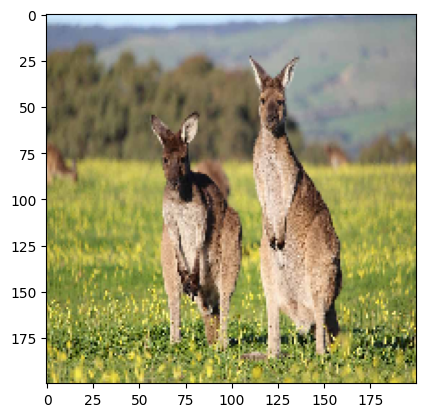

1/1 [==============================] - 0s 135ms/step
3.jpg bird not detected


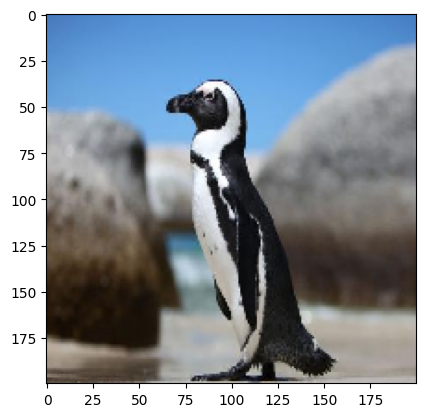

1/1 [==============================] - 0s 33ms/step
2.jpg bird detected


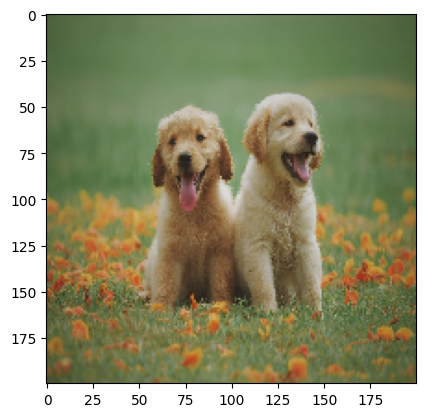

1/1 [==============================] - 0s 32ms/step
4.jpg bird not detected


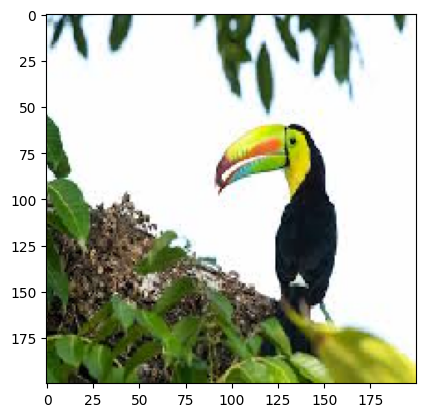

1/1 [==============================] - 0s 35ms/step
5.jpeg bird not detected


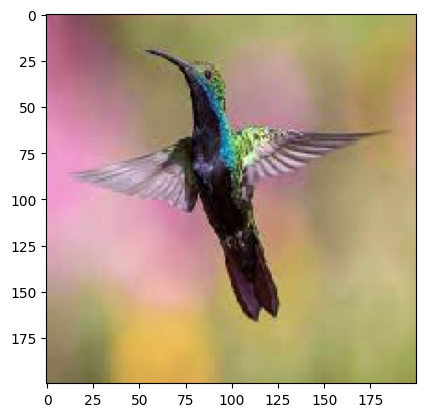

1/1 [==============================] - 0s 49ms/step
6.jpeg bird detected


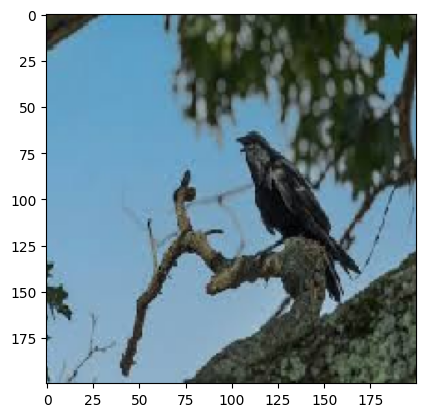

1/1 [==============================] - 0s 31ms/step
7.jpeg bird detected


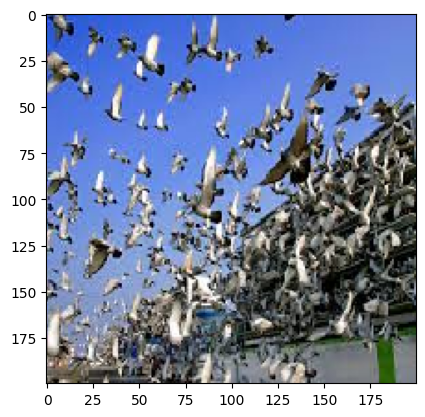

1/1 [==============================] - 0s 45ms/step
8.jpeg bird detected


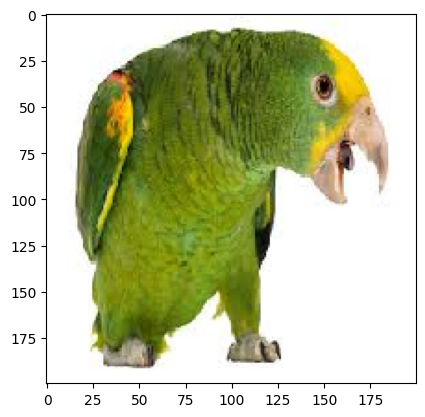

1/1 [==============================] - 0s 34ms/step
9.jpeg bird not detected


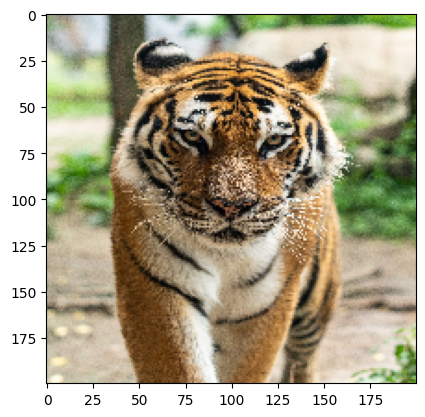

1/1 [==============================] - 0s 65ms/step
10.jpg bird not detected


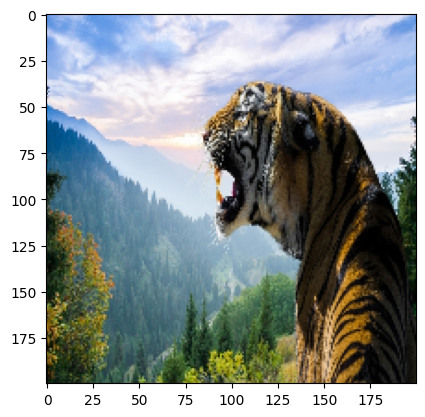

1/1 [==============================] - 0s 73ms/step
1.jpg bird detected


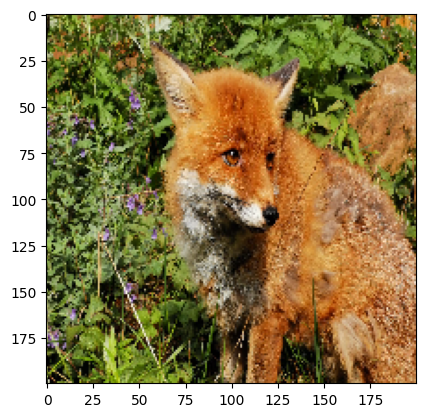

1/1 [==============================] - 0s 65ms/step
11.jpeg bird not detected


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dir_path="/content/drive/MyDrive/images-1/testing"
for i in os.listdir(dir_path):
  img=load_img(dir_path+'/'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  if(val==1):
    print(i,'bird detected')
  else:
    print(i,'bird not detected')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
